# 전이 학습


- 학습에 필요한 데이터의 양이 충분하지 않아도 사전에 훈련된 딥러닝 모델로 데이터의 일부만 재학습시켜
  원하는 원하는 목적에 필요한 모델을 만들어내는 기술
- 특정 분야에서 학습된 신경망의 일부 능력을 비슷하거나 또는 새로운 분야에서 사용되는 신경망의 학습에
  이용하는 것
- 데이터 증강(Data Augmentation)과 마찬가지로 데이터의 양이 많지 않을 때 효과적으로 사용


## 이미 잘 학습된 모델을 가져와서 파인 튜닝한다

- 옵티마이저의 변경
- BatchNormalization 추가
- Dropout 추가
- resnet50 모델까지 전체 학습 → 구조만 가져오고 전부 학습하는 것을 의미
- Data 전처리 및 증강을 통한 학습데이터 개선
- Fully Connected Layer 은닉층 추가 및 노드 추가
- learning decay를 이용해 유동적인 학습 진행


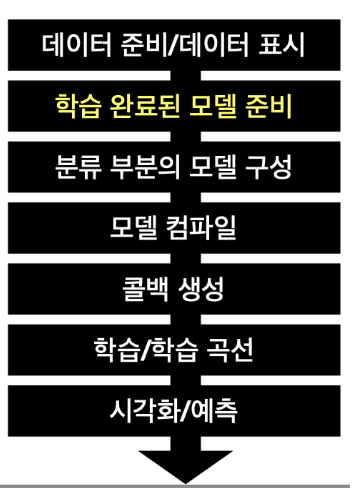


- Fine-tuned ConvNet: 미리 학습된 ConvNet의 마지막 Fully Connected Layer만 변경해 분류 실행
- Pre-trained Model: 미리 학습된 모델의 가중치를 새로운 모델에 적용
- Domain Adaptation: 풍부한 데이터를 바탕으로 훈련 시 **도메인 구분 능력은 약하게 학습**하여 Target
  Data 를 분류가능하도록 모델 구축
- Layer Re-use: 기존 모델의 일부 Layer를 재사용하여 부족 Data Domain 모델 구축에 활용항목 추가


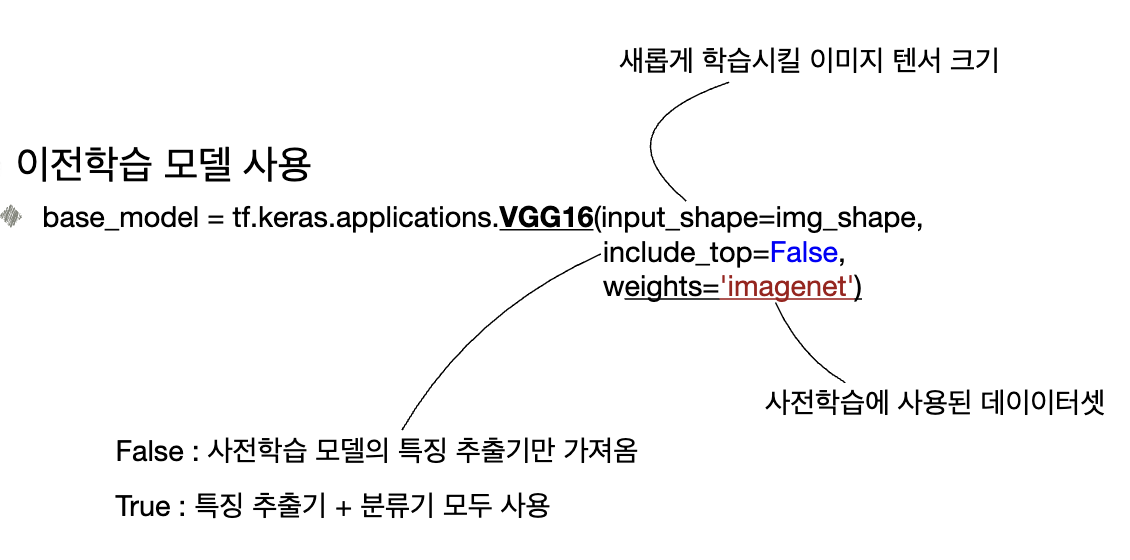


#### 특징 추출기만 가져올건지 분류기까지 가져올껀지


In [3]:
#### Resnet50
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')

img_path = 'berry2.jpeg'
img = image.load_img(img_path, target_size=(224, 224))

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted: [('n02124075', 'Egyptian_cat', 0.41112486), ('n02123597', 'Siamese_cat', 0.32399228), ('n02123045', 'tabby', 0.06014147)]


In [7]:
x.shape

(1, 224, 224, 3)

## cat-dog 전이학습


In [8]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import imread
from tensorflow.keras import models, layers
from tensorflow.keras.applications import mobilenet_v3
